In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-nov-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-nov-2021/train.csv
/kaggle/input/tabular-playground-series-nov-2021/test.csv


# Loading Data and Preprocessing

In [2]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import gc

In [3]:
train_data =  pd.read_csv('../input/tabular-playground-series-nov-2021/train.csv')
test_data =  pd.read_csv('../input/tabular-playground-series-nov-2021/test.csv')

In [4]:
X = train_data.drop('target',axis=1).set_index('id')
y = train_data.target
X_test = test_data.set_index('id')

In [5]:
del train_data, test_data
gc.collect()

72

In [6]:
ss = StandardScaler().fit(pd.concat([X,X_test],axis=0))
X = pd.DataFrame(ss.transform(X),index=X.index,columns=X.columns)
X_test = pd.DataFrame(ss.transform(X_test),index=X_test.index,columns=X_test.columns)

In [7]:
X.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
id,,,,,,,,,,,,,,,,,,,,,
0,-0.404071,0.670632,-0.291317,0.368554,-0.252990,-0.919316,0.636744,-0.170280,-0.290714,-0.286858,...,-0.583422,-0.922311,-0.258768,-0.548041,-0.186314,-0.171925,1.095647,-0.414844,-0.167520,0.392119
1,-0.370291,-0.568556,-0.398150,0.494686,-0.213606,1.572733,-0.922872,-1.951915,1.311086,-0.225201,...,0.609452,0.611672,-0.251968,0.523035,0.042460,2.519256,-1.768825,-0.023539,-0.413908,-0.382451
2,-0.533312,-0.682017,-0.100052,-0.275165,-0.377402,0.317656,1.477564,0.860068,-0.485652,-0.178333,...,0.432779,1.535895,-0.127440,-0.202110,-0.043291,-0.505377,-1.930071,-0.308803,-0.078766,0.060838
3,-0.625965,-1.489304,0.937366,-0.472657,-0.422519,-0.700728,-0.019908,1.294720,1.283179,-0.016758,...,-0.832168,0.620909,-0.314366,-0.519687,-0.165415,-0.292241,-1.270274,-0.421487,-0.273492,-0.310107
4,-0.606081,0.748718,-0.247035,-0.305487,-0.396905,-0.338593,0.904983,-1.670063,0.542063,-0.233802,...,-0.554417,-0.394883,-0.361571,0.372096,-0.023012,-0.310550,-0.929971,-1.005279,-0.395326,-0.209863


In [8]:
X_test.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
id,,,,,,,,,,,,,,,,,,,,,
600000,-0.594155,1.473287,0.568212,-0.217577,1.173354,0.815987,-1.427510,-0.680511,1.537551,-0.179899,...,0.390823,-0.938596,-0.059982,0.220854,-0.224138,-0.444203,-1.411806,-0.467469,-0.062466,-0.427940
600001,-0.584279,-1.321885,-0.733499,0.256962,-0.376758,-0.915474,1.464709,-0.006817,1.316291,-0.161613,...,-0.878576,0.067446,-0.057866,-0.196882,-0.027558,-0.468301,-1.848761,0.702637,-0.256427,-0.040369
600002,2.085350,-0.075786,-0.757924,0.600667,1.261840,1.090701,-0.686424,1.413544,-0.388497,-0.303931,...,-0.791056,-0.317201,-0.283901,0.203296,-0.026325,1.985969,0.995500,0.468170,-0.114787,-0.238980
600003,-0.341736,0.342446,-0.202755,-1.328861,-0.308644,-0.263162,-0.702041,-1.302743,-0.655454,-0.380379,...,-0.207939,-1.491986,-0.200371,0.563053,-0.296391,-0.406132,0.127002,-2.055766,-0.244652,-0.431490
600004,-0.363205,1.706222,-0.339423,-2.025358,-0.256946,-1.385470,-1.332830,1.765337,-1.817554,-0.243908,...,-0.124568,0.092188,-0.035729,-0.170075,-0.093380,-0.217081,-0.887175,0.633943,-0.030677,-0.652078


For simplicity, instead of doing a standard cross-validation, we simply split the training data into half, using one half for training and the half for validating/testing. Our models will be small, so there should be enough data for training without overfitting.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

In [10]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
os.environ["KMP_SETTINGS"] = "0" 

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
logging.getLogger("tensorflow").addHandler(logging.NullHandler(logging.ERROR))

In [11]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers

# Logistic Regression Model

As a warm-up, we first implement logistic regression as a neural network with a single output layer of 1 unit with a sigmoidal activation and no regularization. 

In [12]:
def logistic_regression(input_shape):
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(InputLayer(input_shape=input_shape))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', 
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), 
                  metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])
    model.summary()
    return model  

In [13]:
def train_model(model, X_train, y_train):
    
    callbacks = [EarlyStopping(monitor='val_loss',mode='min',patience=20,restore_best_weights=True)]
    
    X_t, X_v, y_t, y_v = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

    history = model.fit(x=X_t, y=y_t,
                batch_size=1024,
                epochs=500,
                validation_data=(X_v,y_v),
                callbacks=callbacks,
                verbose=1)
    # plot graphs
    fig = plt.figure(figsize=(18, 6))
    figno = [131,132,133]
    metrics = ['loss','auc','accuracy']
    legend_pos = ['upper right','lower right','lower right']
    for i in range(3):
        fig.add_subplot(figno[i])
        metric = metrics[i]
        plt.plot(history.history[metric])
        plt.plot(history.history[F'val_{metric}'])
        plt.title(F'{metric} vs epochs')
        plt.ylabel(metric)
        plt.xlabel('Epoch')
        plt.legend(['Training', 'Validation'], loc=legend_pos[i])
    plt.show()
        
    return model

In [14]:
from sklearn.metrics import accuracy_score, roc_auc_score

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 101       
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
235/235 [==============================] - 3s 5ms/step - loss: 0.8843 - accuracy: 0.5089 - auc: 0.5130 - val_loss: 0.8560 - val_accuracy: 0.5170 - val_auc: 0.5229
Epoch 2/500
235/235 [==============================] - 1s 5ms/step - loss: 0.8358 - accuracy: 0.5220 - auc: 0.5309 - val_loss: 0.8113 - val_accuracy: 0.5312 - val_auc: 0.5415
Epoch 3/500
235/235 [==============================] - 1s 4ms/step - loss: 0.7939 - accuracy: 0.5355 - auc: 0.5500 - val_loss: 0.7729 - val_accuracy: 0.5440 - val_auc: 0.5612
Epoch 4/500
235/235 [==============================] - 1s 4ms/step - loss: 0.7581 - accuracy: 0.5507 - auc: 0.5701 - val_loss: 

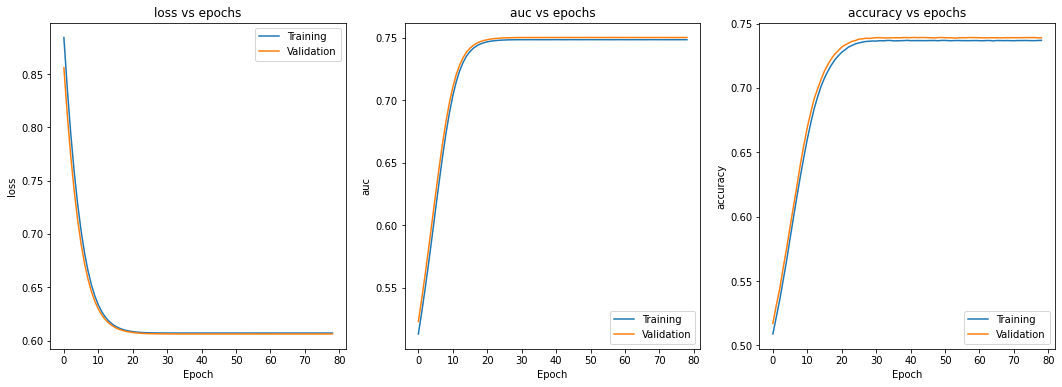

Test accuracy: 0.73656
Test AUC: 0.7493178487425134


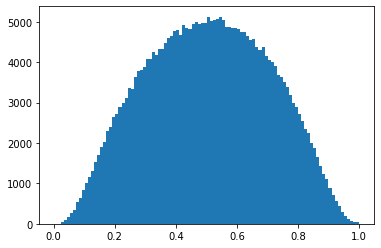

In [15]:
y_pred = train_model(logistic_regression((X.shape[1],)), X_train, y_train).predict(X_valid)
print(F'Test accuracy: {accuracy_score(y_valid,y_pred>0.5)}')
print(F'Test AUC: {roc_auc_score(y_valid,y_pred)}')

_=plt.hist(y_pred,bins=100)
      

As can be seen, the logistic model outputs a unimodal distribution of predictions (probabilities). We would expect 2 modes around 0.25 and 0.75, but the logistic model, being a linear model, is not able to capture that. 

A common way to improve the fit is to add additional layers into the network, essentially increasing the number of model parameters. We know a deeper neural network is able to capture the bimodal distribution, but there is another direction to generalize the logistic model.

# Mixture of Bernoulli Distributions

The logistic model (and other multi-layer neural networks) outputs the probability of class "1". We can also interpret this output as the parameter (mean) of a Bernoulli distribution. Viewed this way, one way to generalize the model is to replace the Bernoulli distribution by another probability distribution of binary random variable. One such distribution is mixture of Bernoulli distributions. 

Modeling the probability distribution as a mixture of 2 Bernoullis has the following nice interpretation. There is a common belief that approximately 25% of the original target values of this dataset have been "flipped". So the categorical distribution of the mixture (which is another Bernoulli distribution) models the probability $p(1 \mbox{ before flip})$. The 2 Bernoulli distributions model respectively $p(1|1\mbox{ before flip})$ and $p(1|0\mbox{ before flip})$.

To this end, we want to build a neural network that outputs a probability distribution, not a tensor. The TensorFlow Probability library makes this easy. We simply replace the last dense layer (with single unit) by a dense layer with appropriate number of units *and no activation* that will be fed into a final, non-trainable layer `MixtureSameFamily` that encapsulates the mixture of Bernoullis probability model.

In [16]:
def mixture_of_bernoullis(input_shape):
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(InputLayer(input_shape=input_shape))
    # replace last layer with sigmoidal activation by a probabilistic layer
    comps = 2
    event_shape = [1]
    params_size = tfpl.MixtureSameFamily.params_size(comps,
                                                     component_params_size=tfpl.IndependentBernoulli.params_size(event_shape))              
    model.add(Dense(params_size, activation=None))
    model.add(tfpl.MixtureSameFamily(comps, tfpl.IndependentBernoulli(event_shape),
                                    convert_to_tensor_fn=tfp.distributions.Distribution.mean))
    
    model.compile(loss=lambda y_true, y_pred: -y_pred.log_prob(y_true), # loss function "binary cross-entropy" replaced by "minus log likelihood"
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), 
                  metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])
    model.summary()
    return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 404       
_________________________________________________________________
mixture_same_family (Mixture multiple                  0         
Total params: 404
Trainable params: 404
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
235/235 [==============================] - 2s 7ms/step - loss: 0.8038 - accuracy: 0.4986 - auc: 0.4983 - val_loss: 0.7820 - val_accuracy: 0.5083 - val_auc: 0.5127
Epoch 2/500
235/235 [==============================] - 2s 7ms/step - loss: 0.7671 - accuracy: 0.5180 - auc: 0.5241 - val_loss: 0.7488 - val_accuracy: 0.5274 - val_auc: 0.5398
Epoch 3/500
235/235 [==============================] - 1s 4ms/step - loss: 0.7362 - accuracy: 0.5379 - auc: 0.5519 - val_loss: 0.7210 - val_accuracy: 0.5500 - val_auc: 0.

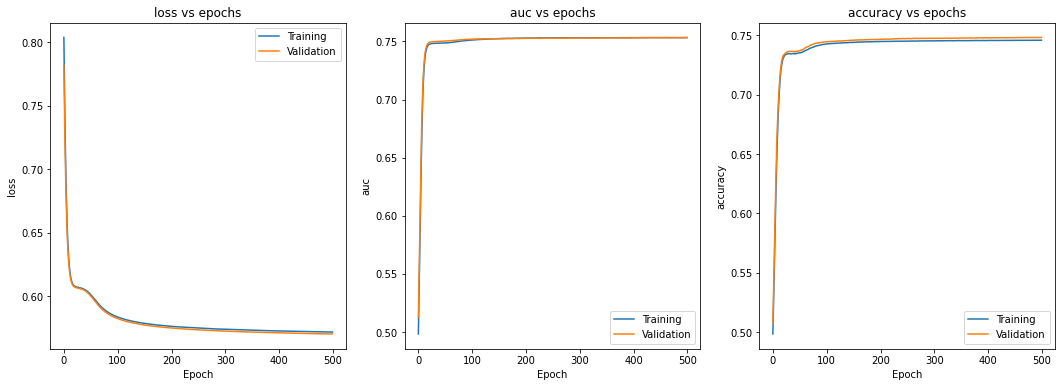

Test accuracy: 0.74539
Test AUC: 0.7512198034932522


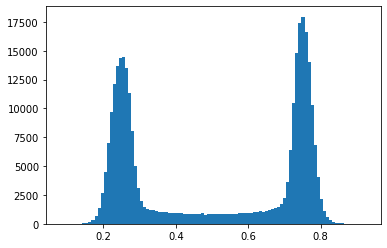

In [17]:
model = train_model(mixture_of_bernoullis((X.shape[1],)), X_train, y_train)
y_pred = model.predict(X_valid)
print(F'Test accuracy: {accuracy_score(y_valid,y_pred>0.5)}')
print(F'Test AUC: {roc_auc_score(y_valid,y_pred)}')

_=plt.hist(y_pred,bins=100)

More than a thousand epochs later, we get the fitted model, and the distribution of predicted probabilities is bimodal as expected.

Let's try our luck and submit the predictions for the test data using this model.

In [18]:
predictions_test = model.predict(X_test).flatten()

In [19]:
pd.DataFrame({'id': X_test.index, 'target': predictions_test}).to_csv('submission.csv', index=False)
print("Submission saved!")

Submission saved!
